In [43]:
import xspec as xsp

xsp.AllModels.clear()
xsp.AllData.clear()
xsp.AllChains.clear()

s = xsp.Spectrum('data/spec.fits')

s.response = 'data/rmf.fits'
s.response.arf = 'data/arf.fits'

s.ignore('**-15')
s.ignore('300-**')
xsp.AllData.ignore('bad')

model_name = 'phabs*po'

m = xsp.Model(model_name)



In [13]:
xsp.Fit.query = 'yes'
xsp.Fit.perform()

In [53]:
m.show()

In [14]:
import matplotlib.pyplot as plt


In [27]:
xsp.Plot.device = '/null'

xsp.Plot.xLog = True
xsp.Plot.yLog = True
xsp.Plot.setRebin(10., 10)
xsp.Plot.xAxis = 'keV'
# Plot("data","model","resid")
# Plot("data model resid")
xsp.Plot("data,delchi")

chans = xsp.Plot.x()
rates = xsp.Plot.y()
folded = xsp.Plot.model()

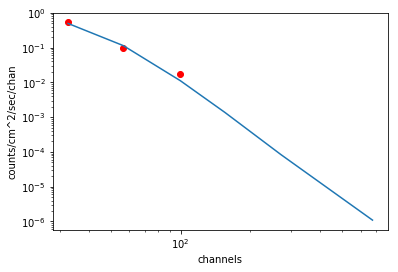

In [28]:
plt.loglog(chans, rates, 'ro', chans, folded)
plt.xlabel('channels')
plt.ylabel('counts/cm^2/sec/chan')
plt.savefig('myplot')